/var/folders/h7/ybt818f52gj6_5tp78gxrf6c0000gn/T/ipykernel_2760/3252577578.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


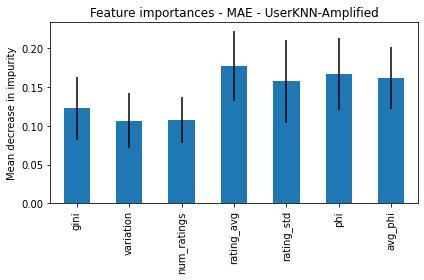

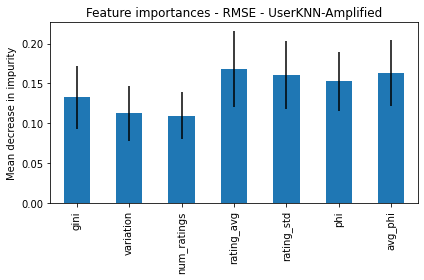

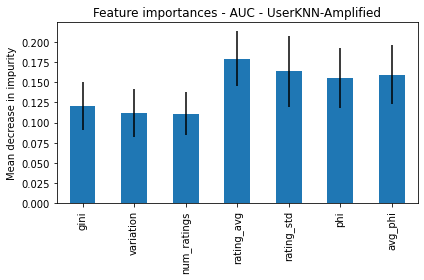

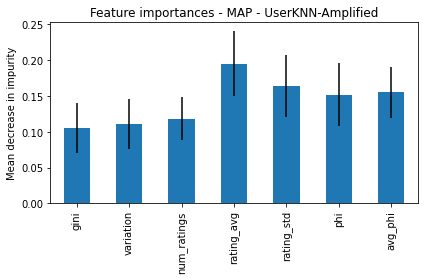

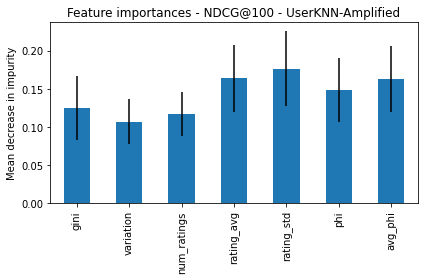

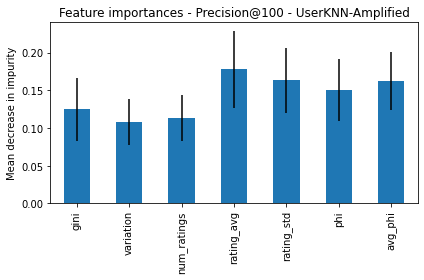

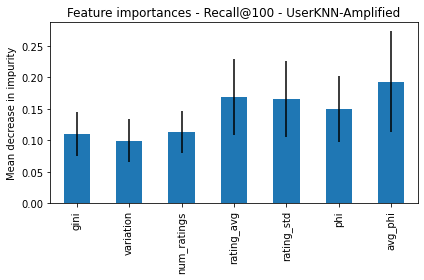

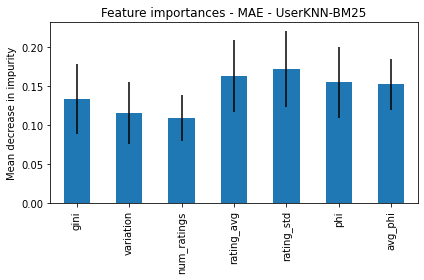

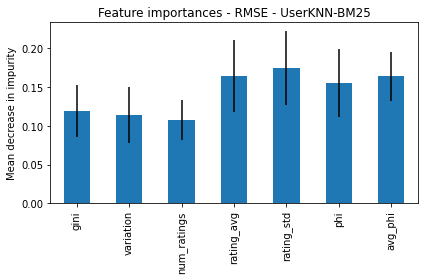

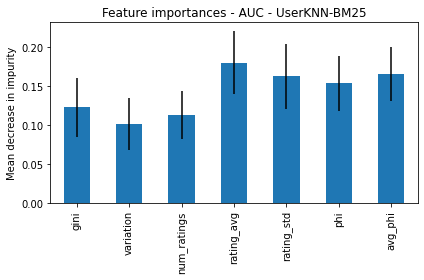

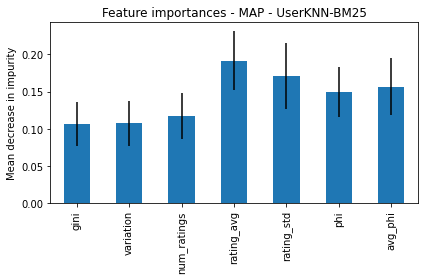

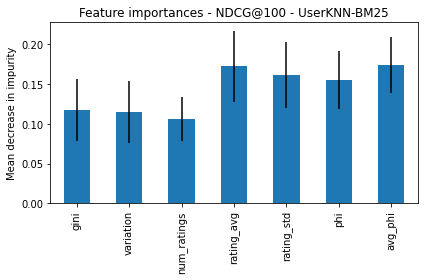

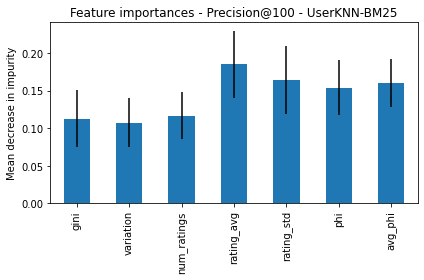

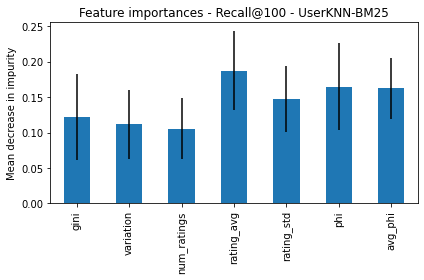

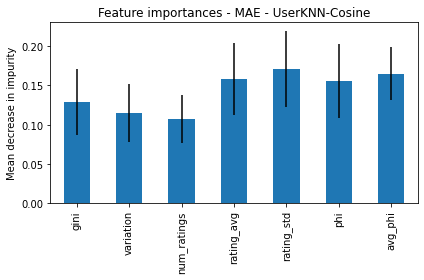

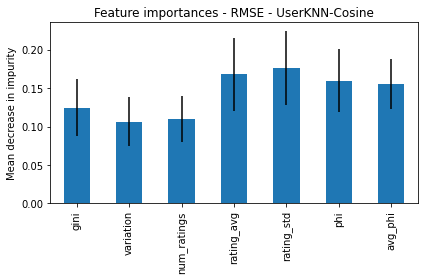

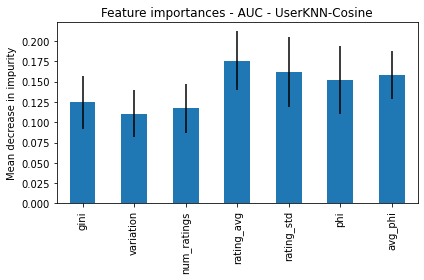

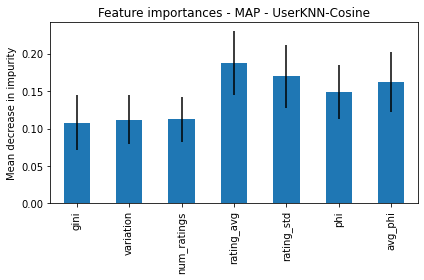

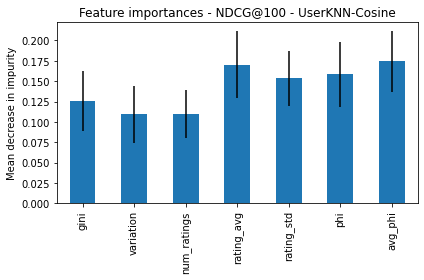

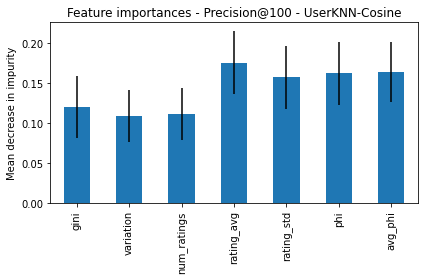

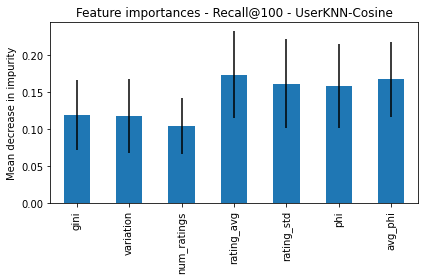

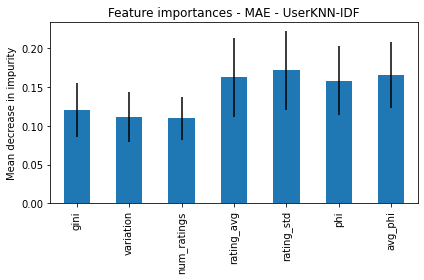

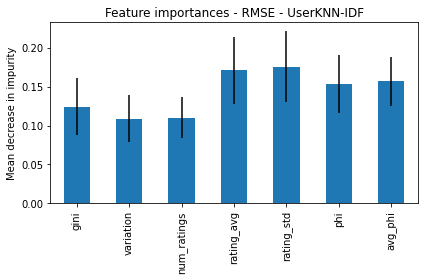

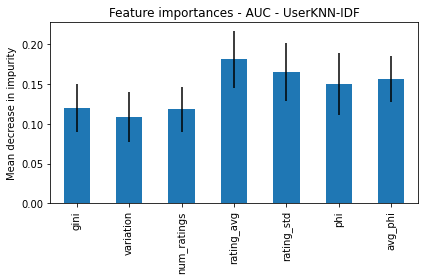

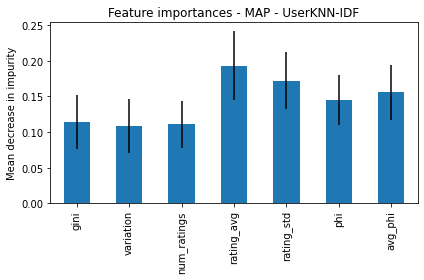

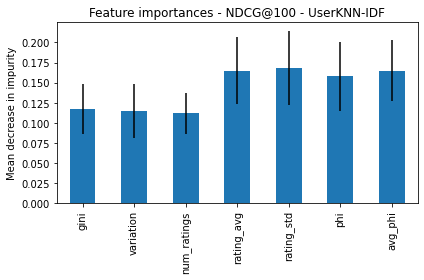

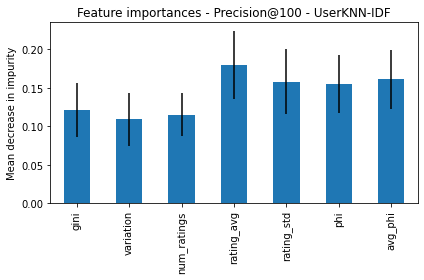

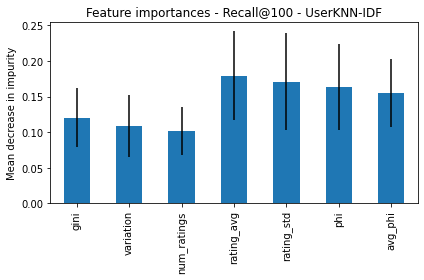

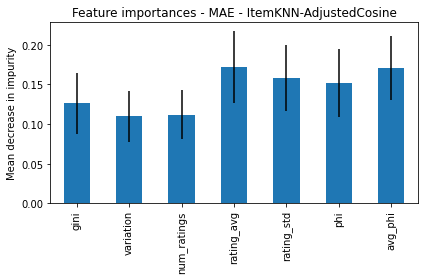

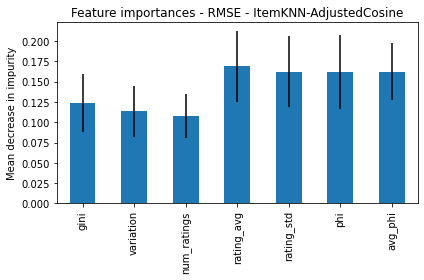

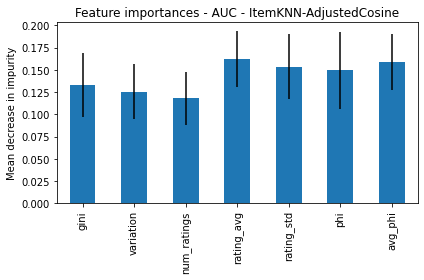

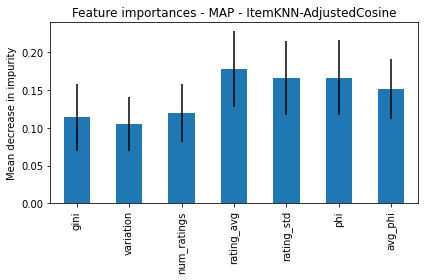

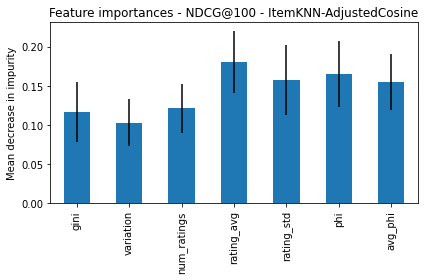

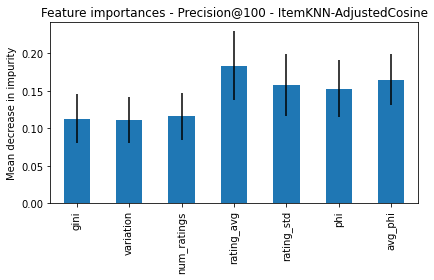

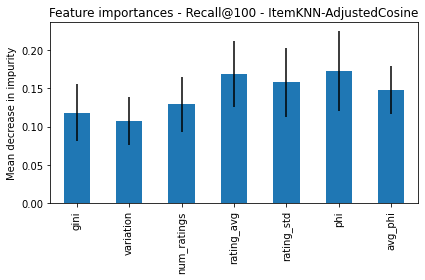

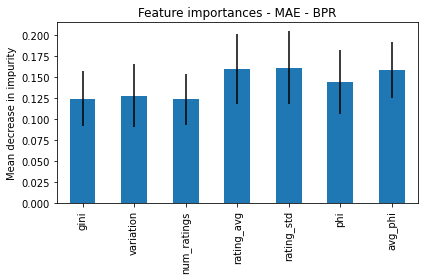

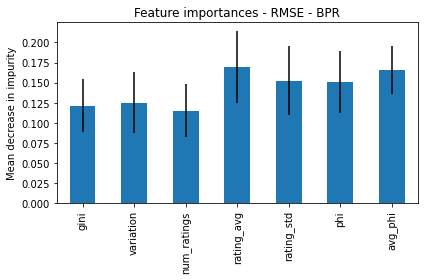

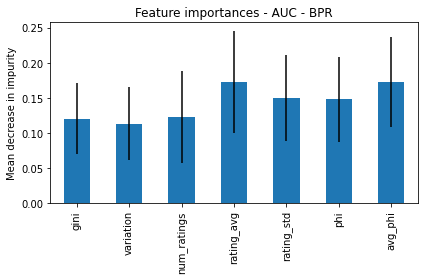

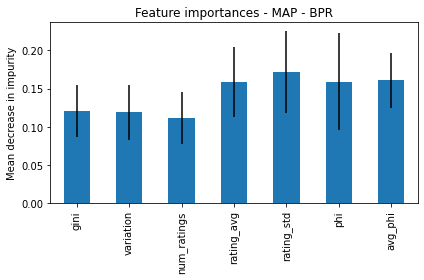

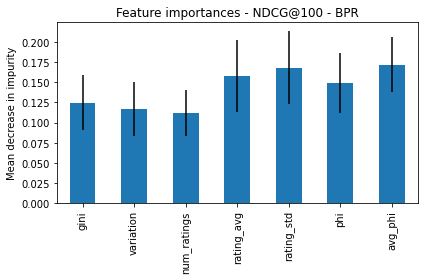

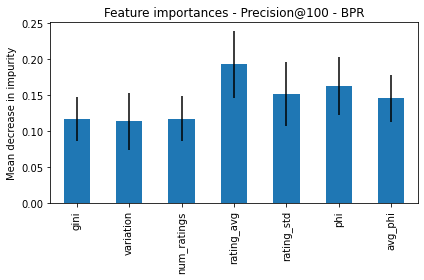

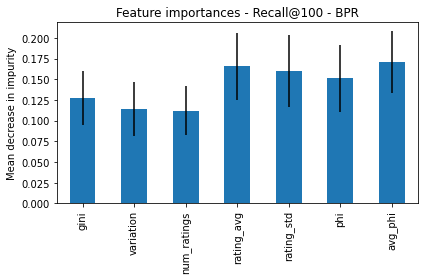

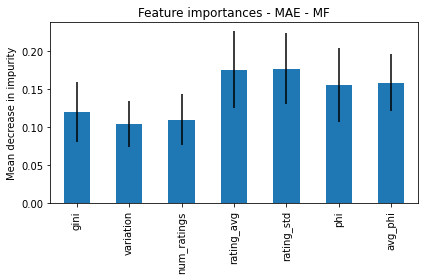

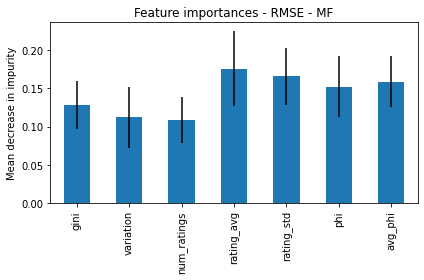

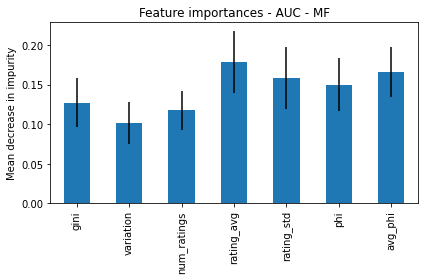

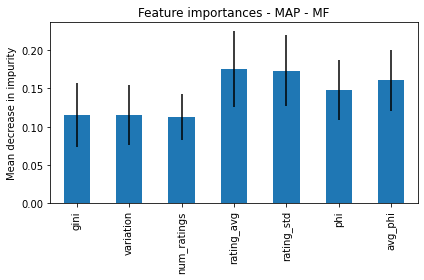

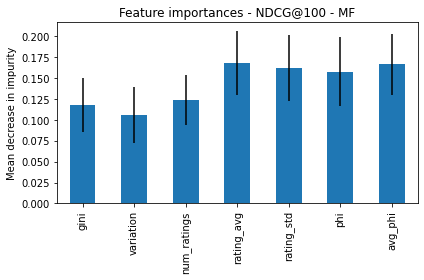

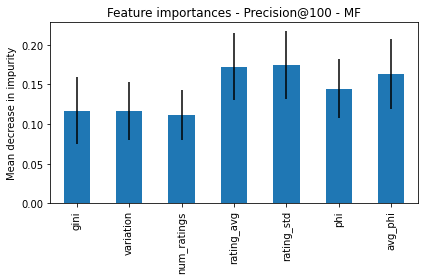

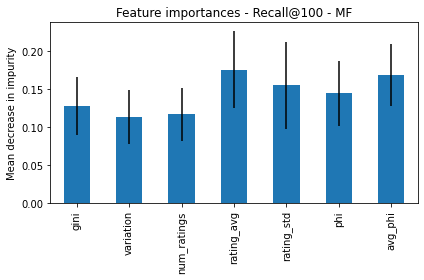

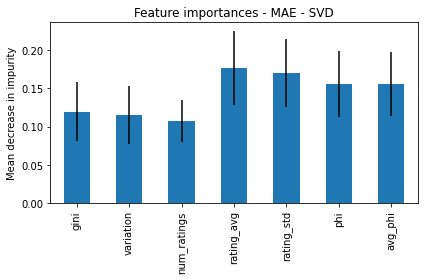

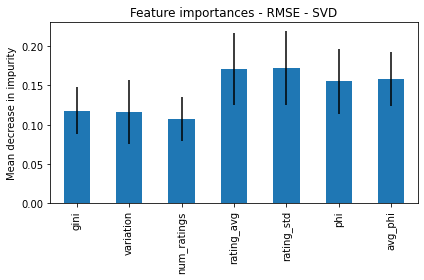

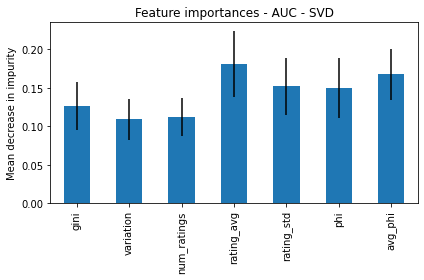

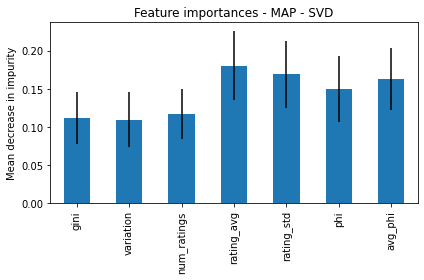

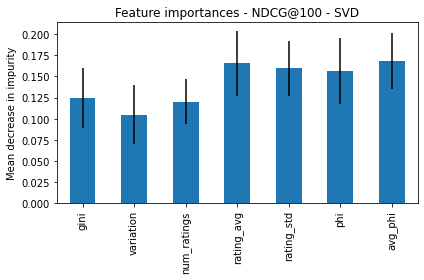

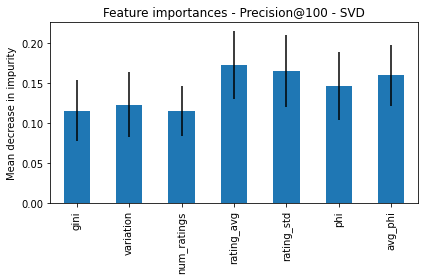

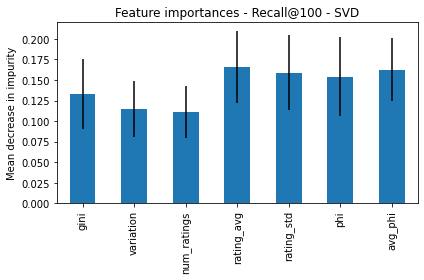

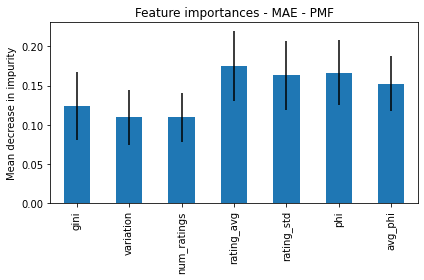

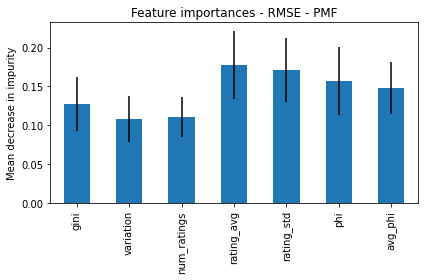

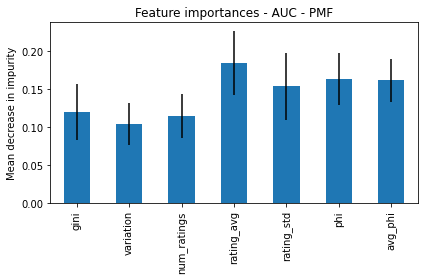

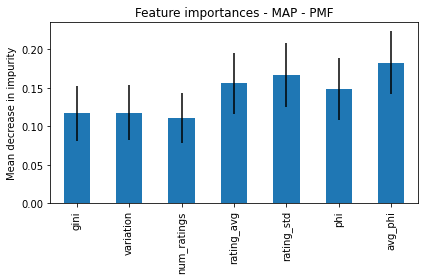

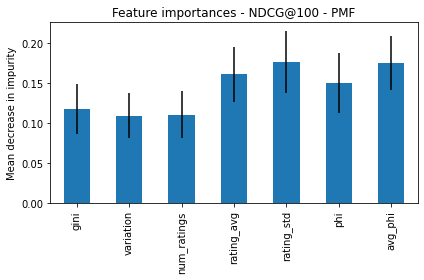

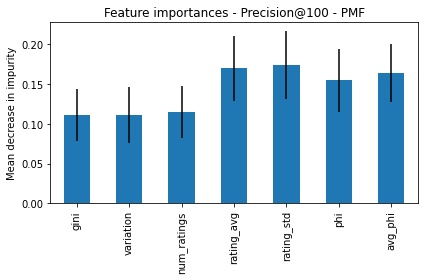

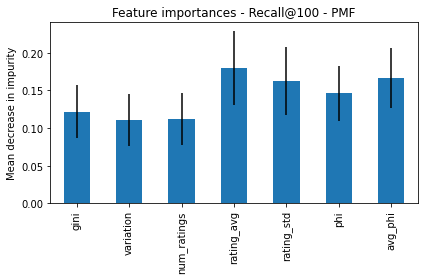

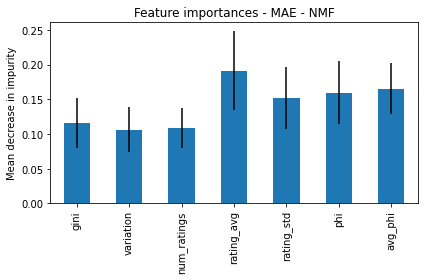

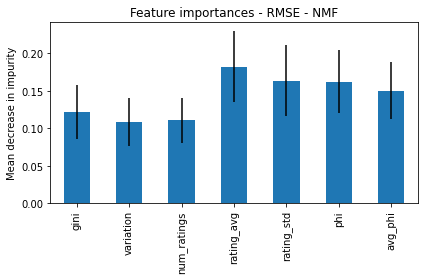

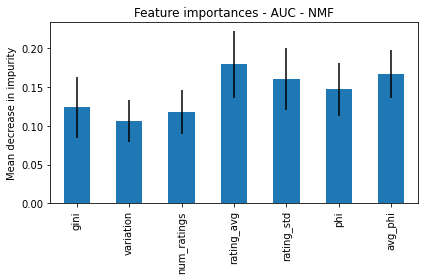

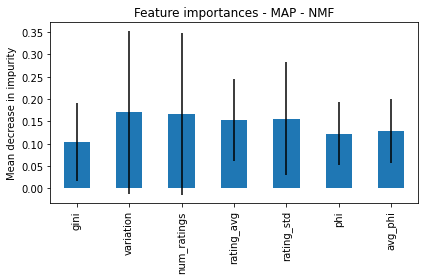

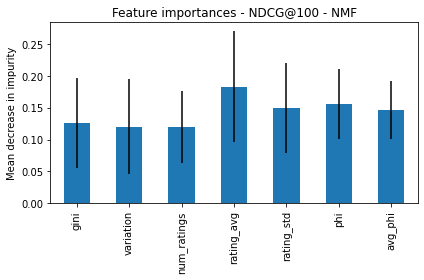

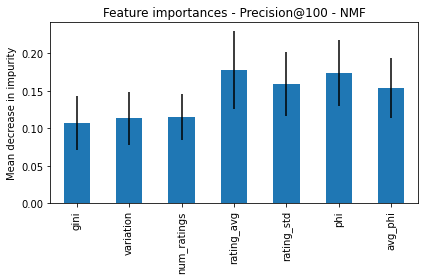

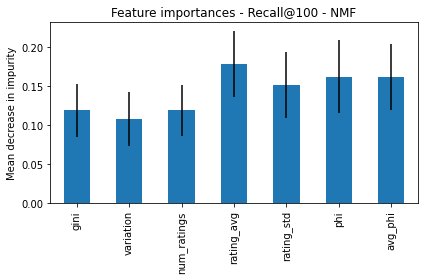

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

def get_x_y_from_pandas(df, features_str, algo):
    X, Y = [], []
    xs = [[] for _ in range(len(features_str))]
    
    for i, f in enumerate(features_str):
        xs[i] = df[[f]].to_numpy().flatten()
    ys = df[[algo]].to_numpy().flatten()
    
    for i in range(len(xs[0])):
        X.append([x[i] for x in xs])
        Y.append(ys[i])
    return np.array(X), np.array(Y)


DS = "ml-100k"
# DS = "ml-1M"

MODEL_NAMES = ["UserKNN-Amplified", "UserKNN-BM25", "UserKNN-Cosine", "UserKNN-IDF",
               "ItemKNN-AdjustedCosine", "BPR", "MF", "SVD", "PMF", "NMF"]
METRICS = ["MAE", "RMSE", "AUC", "MAP", "NDCG@100", "Precision@100", "Recall@100"]
FEATURES = ["uid", "gini", "variation", "num_ratings", "rating_avg", "rating_std",
            "phi", "avg_phi"]

# metric = "NDCG@100"
# algo = "UserKNN-Amplified"

for algo in MODEL_NAMES:
    for metric in METRICS:
        df_features = pd.read_csv(f"../datasets/{DS}/user_metrics.csv",
                                  sep='\s*,\s*', index_col=0, engine='python')
        df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                                sep='\s*,\s*', index_col=0, engine='python')
        df = df_features.join(df_models)

        x, y = get_x_y_from_pandas(df, FEATURES[1:], algo)
        forest = RandomForestRegressor()
        forest.fit(x,y)
        importances = forest.feature_importances_
        std = np.std([
            tree.feature_importances_ for tree in forest.estimators_], axis=0)
        forest_importances = pd.Series(importances, index=FEATURES[1:])
        fig, ax = plt.subplots()
        forest_importances.plot.bar(yerr=std, ax=ax)
        ax.set_title(f"Feature importances - {metric} - {algo}")
        ax.set_ylabel("Mean decrease in impurity")
        fig.tight_layout()

# for i, algo in enumerate(algos_2):
#     x, y = get_x_y_from_pandas(df, features_str, algo)
#     forest = RandomForestRegressor()
#     forest.fit(x,y)
#     importances = forest.feature_importances_
#     std = np.std([
#         tree.feature_importances_ for tree in forest.estimators_], axis=0)
#     forest_importances = pd.Series(importances, index=features_str)
#     fig, ax = plt.subplots()
#     forest_importances.plot.bar(yerr=std, ax=ax)
#     ax.set_title("Feature importances")
#     ax.set_ylabel("Mean decrease in impurity")
#     fig.tight_layout()